In [1]:
# !pip install numpy pandas matplotlib seaborn missingno category-encoders scikit-learn catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df=pd.read_csv("train.csv")

In [4]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Task
0,2017-04-24,Navi-Mumbai,14.5,17.8,14.2,NaN,NaN,NaN,NaN,NaN,...,94.0,NaN,1024.1,1022.5,8.0,NaN,16.2,NaN,Yes,1.0
1,2013-10-11,Kota,24.6,39.5,0.0,12.0,NaN,SE,31.0,N,...,52.0,21.0,1011.8,1006.6,2.0,4.0,30.1,39.2,No,0.0
2,2012-02-18,Vadodara,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,...,87.0,57.0,1018.2,1015.4,7.0,3.0,17.3,24.5,No,0.0
3,2012-02-18,Kanpur,18.3,26.6,0.0,NaN,NaN,SE,28.0,WSW,...,79.0,67.0,1017.0,1016.5,6.0,NaN,23.0,25.4,No,0.0
4,2011-10-11,Srinagar,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,...,63.0,47.0,1018.6,1017.1,NaN,NaN,14.4,18.3,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,2013-10-22,Navi-Mumbai,10.0,17.2,0.0,9.6,8.8,NaN,NaN,SW,...,58.0,58.0,1027.2,1025.7,7.0,1.0,13.8,16.0,No,0.0
116364,2015-05-29,Ranchi,7.7,21.1,0.0,1.4,8.9,E,35.0,NE,...,69.0,43.0,1026.7,1023.0,1.0,1.0,12.3,20.1,No,0.0
116365,2012-03-17,Dhanbad,7.6,21.7,0.0,6.0,11.2,SE,39.0,NE,...,85.0,42.0,1021.1,1019.6,2.0,2.0,13.7,21.2,No,0.0
116366,2014-06-23,Vijayawada,8.8,14.8,0.0,1.2,2.0,NNE,56.0,N,...,56.0,62.0,998.7,990.9,3.0,7.0,14.1,13.6,No,0.0


In [5]:
test_df = pd.read_csv("test.csv")

In [6]:
# Splitting Date into seperate columns
train_df['Date'] = pd.to_datetime(train_df['Date'])

train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day

train_df.drop(['Date'], axis=1, inplace=True)




In [7]:
# counts stores counts of Locations where the Task is 1
counts = train_df[train_df['Task'] == 1]['Location'].value_counts().to_dict()
totCounts = train_df["Location"].value_counts()
counts

{'Nasik': 879,
 'Kalyan-Dombivali': 765,
 'Coimbatore': 762,
 'Navi-Mumbai': 744,
 'Aurangabad': 744,
 'Surat': 743,
 'Meerut': 729,
 'Hyderabad': 700,
 'Allahabad': 699,
 'Raipur': 686,
 'Sydney': 662,
 'Bhopal': 653,
 'Kolkata': 653,
 'Vijayawada': 626,
 'Visakhapatnam': 625,
 'Vasai-Virar': 615,
 'Jaipur': 606,
 'Chennai': 593,
 'Faridabad': 586,
 'Rajkot': 566,
 'Jodhpur': 561,
 'Nagpore': 561,
 'Srinagar': 554,
 'Kanpur': 552,
 'Patna': 518,
 'Vadodara': 518,
 'Ghaziabad': 510,
 'Indore': 509,
 'Jabalpur': 501,
 'Dhanbad': 488,
 'Penrith': 477,
 'Mumbai': 473,
 'Delhi': 471,
 'Ranchi': 459,
 'Thane': 453,
 'Pimpri-Chinchwad': 450,
 'Lucknow': 430,
 'Pune': 430,
 'Varanasi': 417,
 'Howrah': 399,
 'Gwalior': 373,
 'Ahmedabad': 311,
 'Bangalore': 299,
 'Ludhiana': 257,
 'Kota': 204,
 'Agra': 200,
 'Madurai': 194,
 'Amritsar': 158,
 'Guwahati': 94}

In [8]:
totCounts

Location
Indore              2778
Sydney              2623
Rajkot              2587
Vijayawada          2572
Ghaziabad           2566
Srinagar            2564
Raipur              2560
Jabalpur            2530
Navi-Mumbai         2455
Kalyan-Dombivali    2455
Aurangabad          2451
Thane               2446
Patna               2444
Chennai             2442
Bhopal              2442
Penrith             2440
Jodhpur             2439
Delhi               2439
Visakhapatnam       2439
Ranchi              2434
Vasai-Virar         2431
Nagpore             2430
Varanasi            2428
Nasik               2426
Kolkata             2424
Hyderabad           2422
Mumbai              2421
Madurai             2419
Allahabad           2416
Ahmedabad           2414
Bangalore           2411
Surat               2410
Dhanbad             2410
Vadodara            2401
Pimpri-Chinchwad    2398
Meerut              2395
Lucknow             2393
Amritsar            2391
Coimbatore          2390
Kanpur          

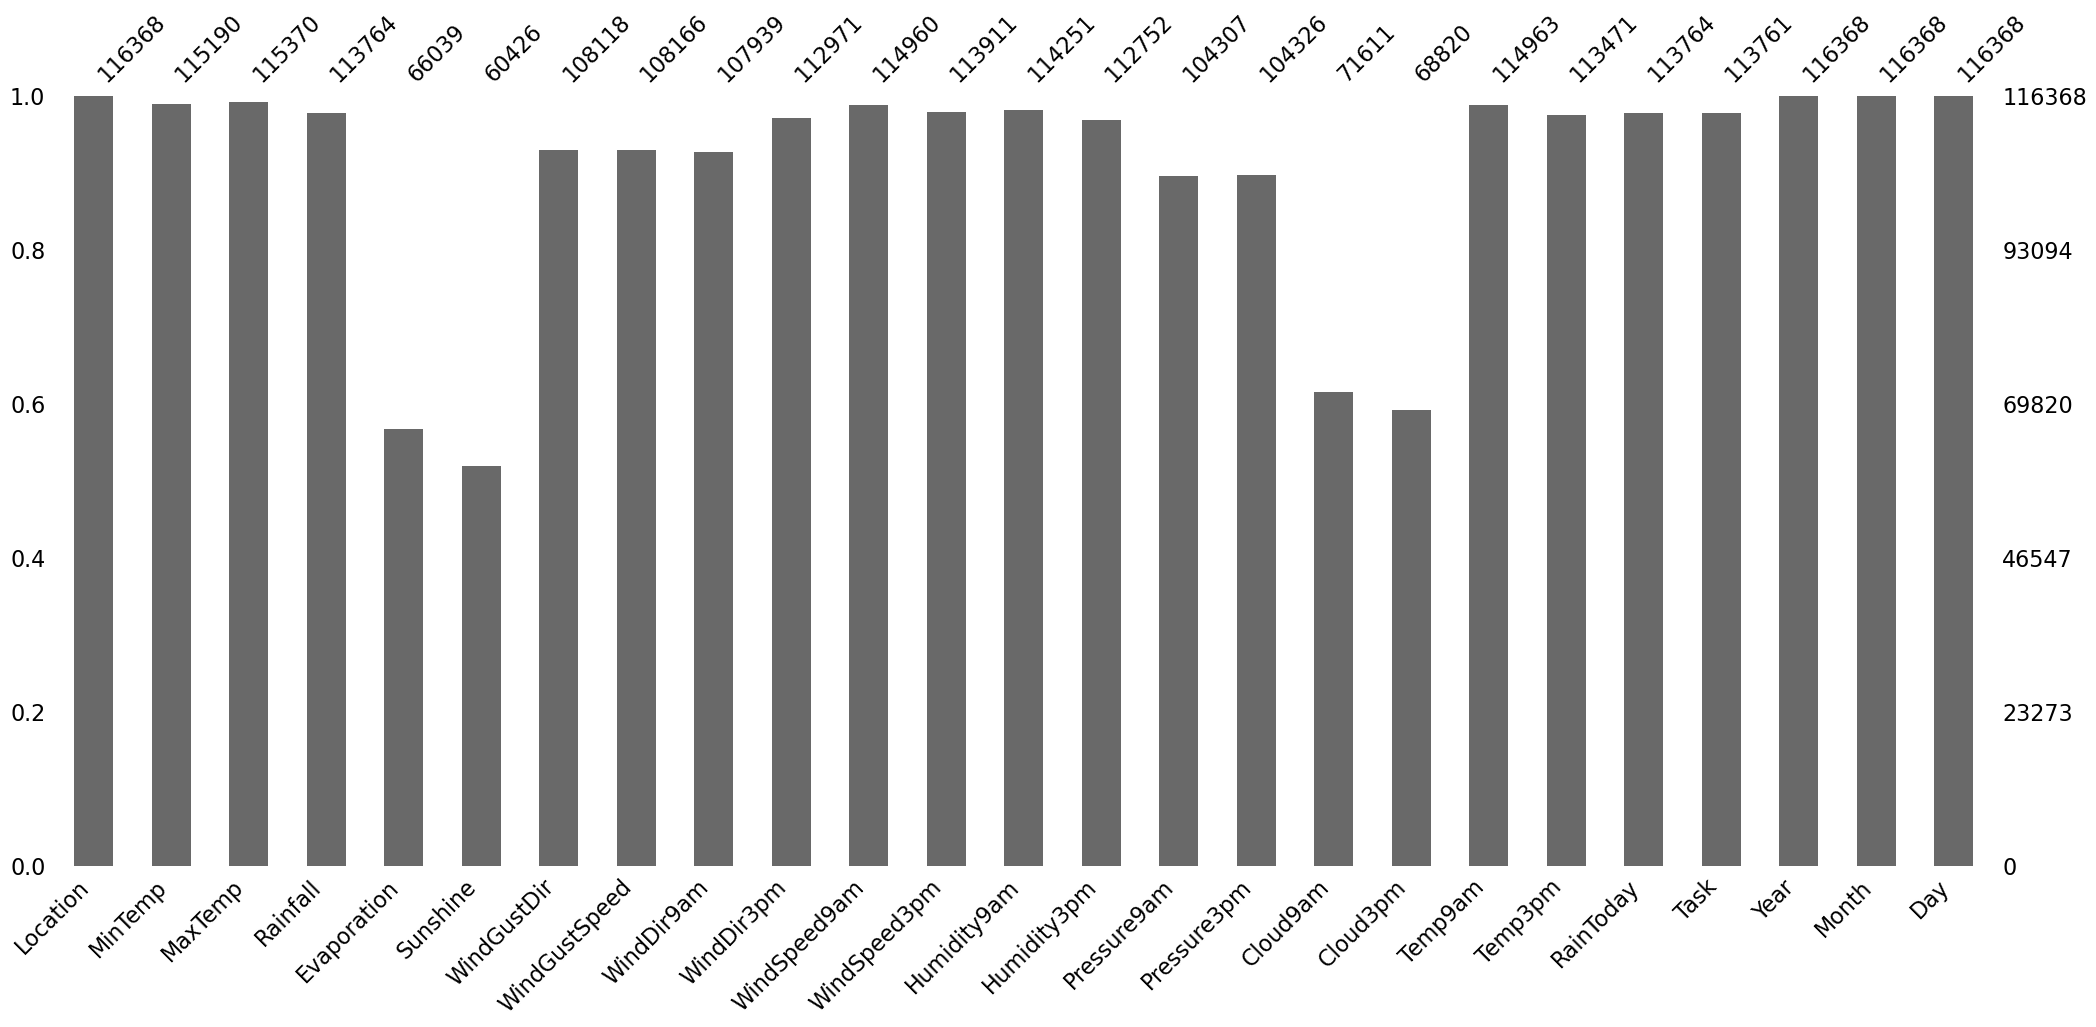

In [9]:
msno.bar(train_df)
plt.savefig('NULL_msno_bar.png')

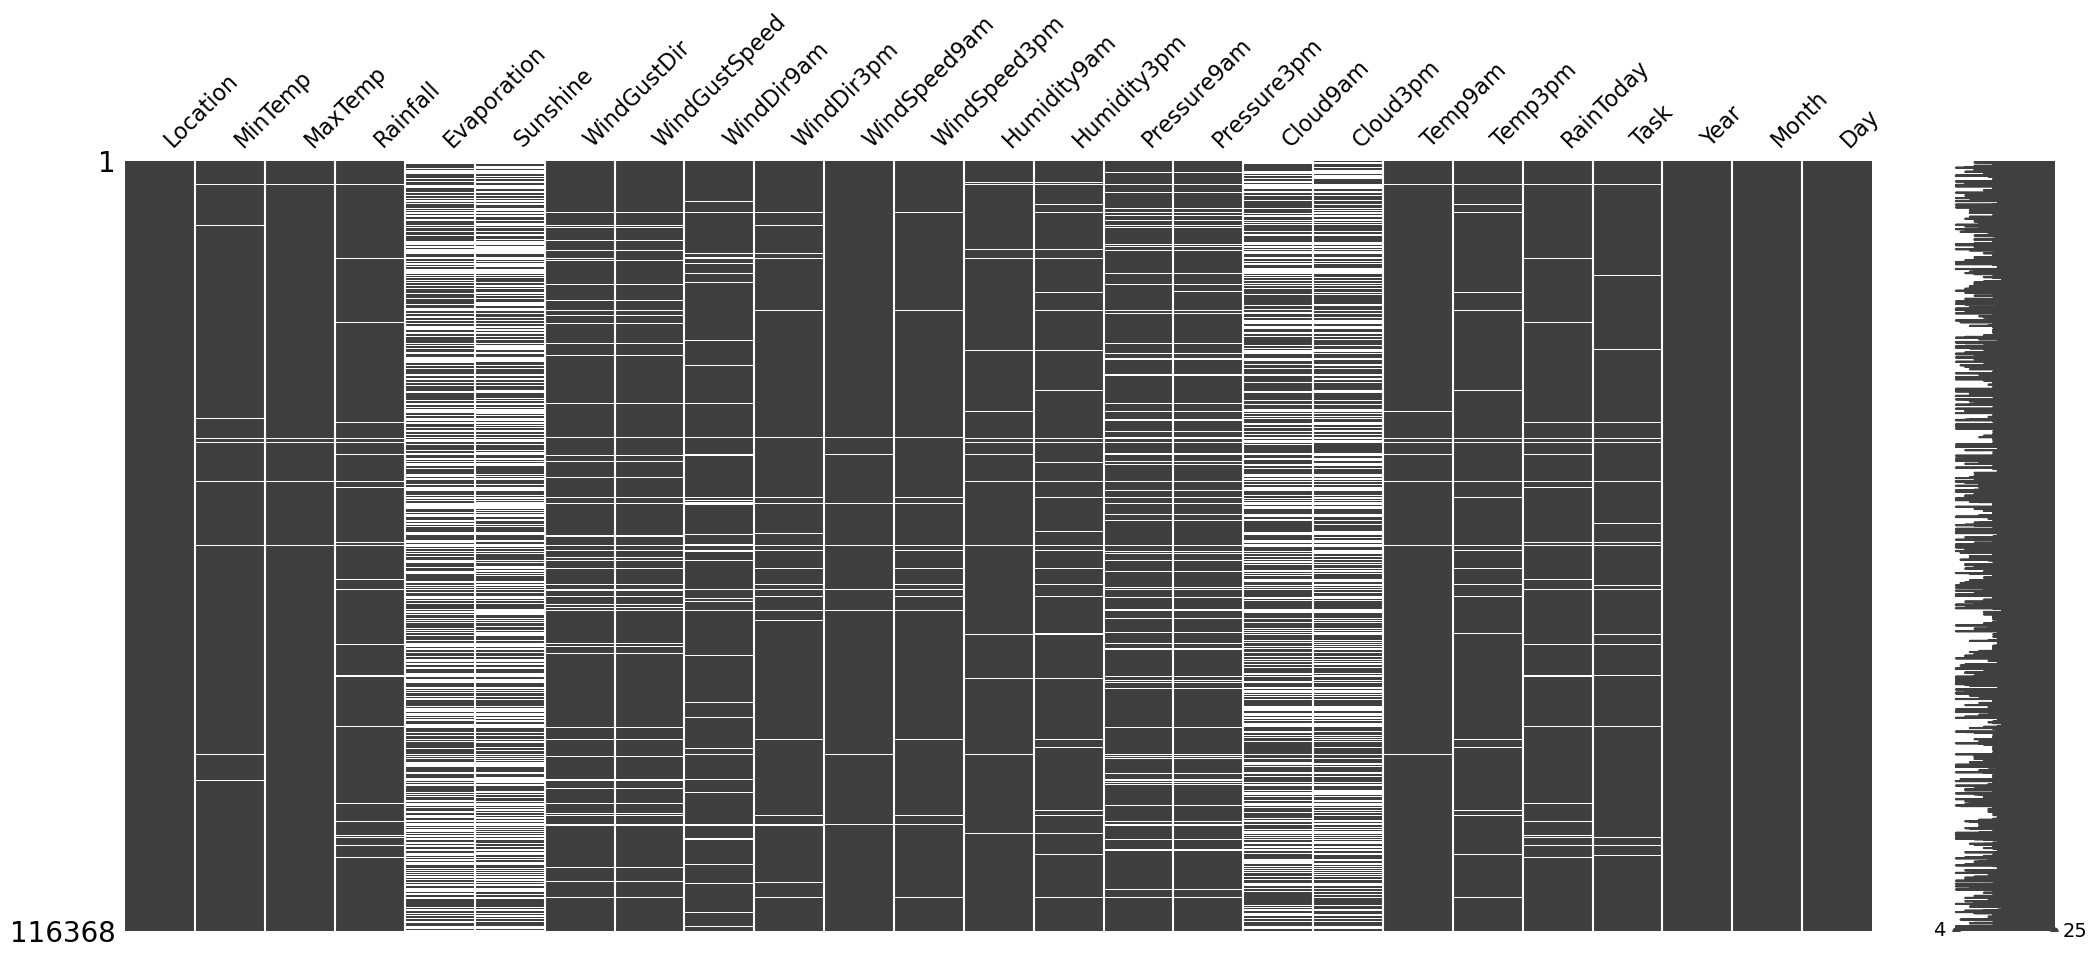

In [10]:
msno.matrix(train_df)
plt.savefig('NULL_msno_matrix.png')

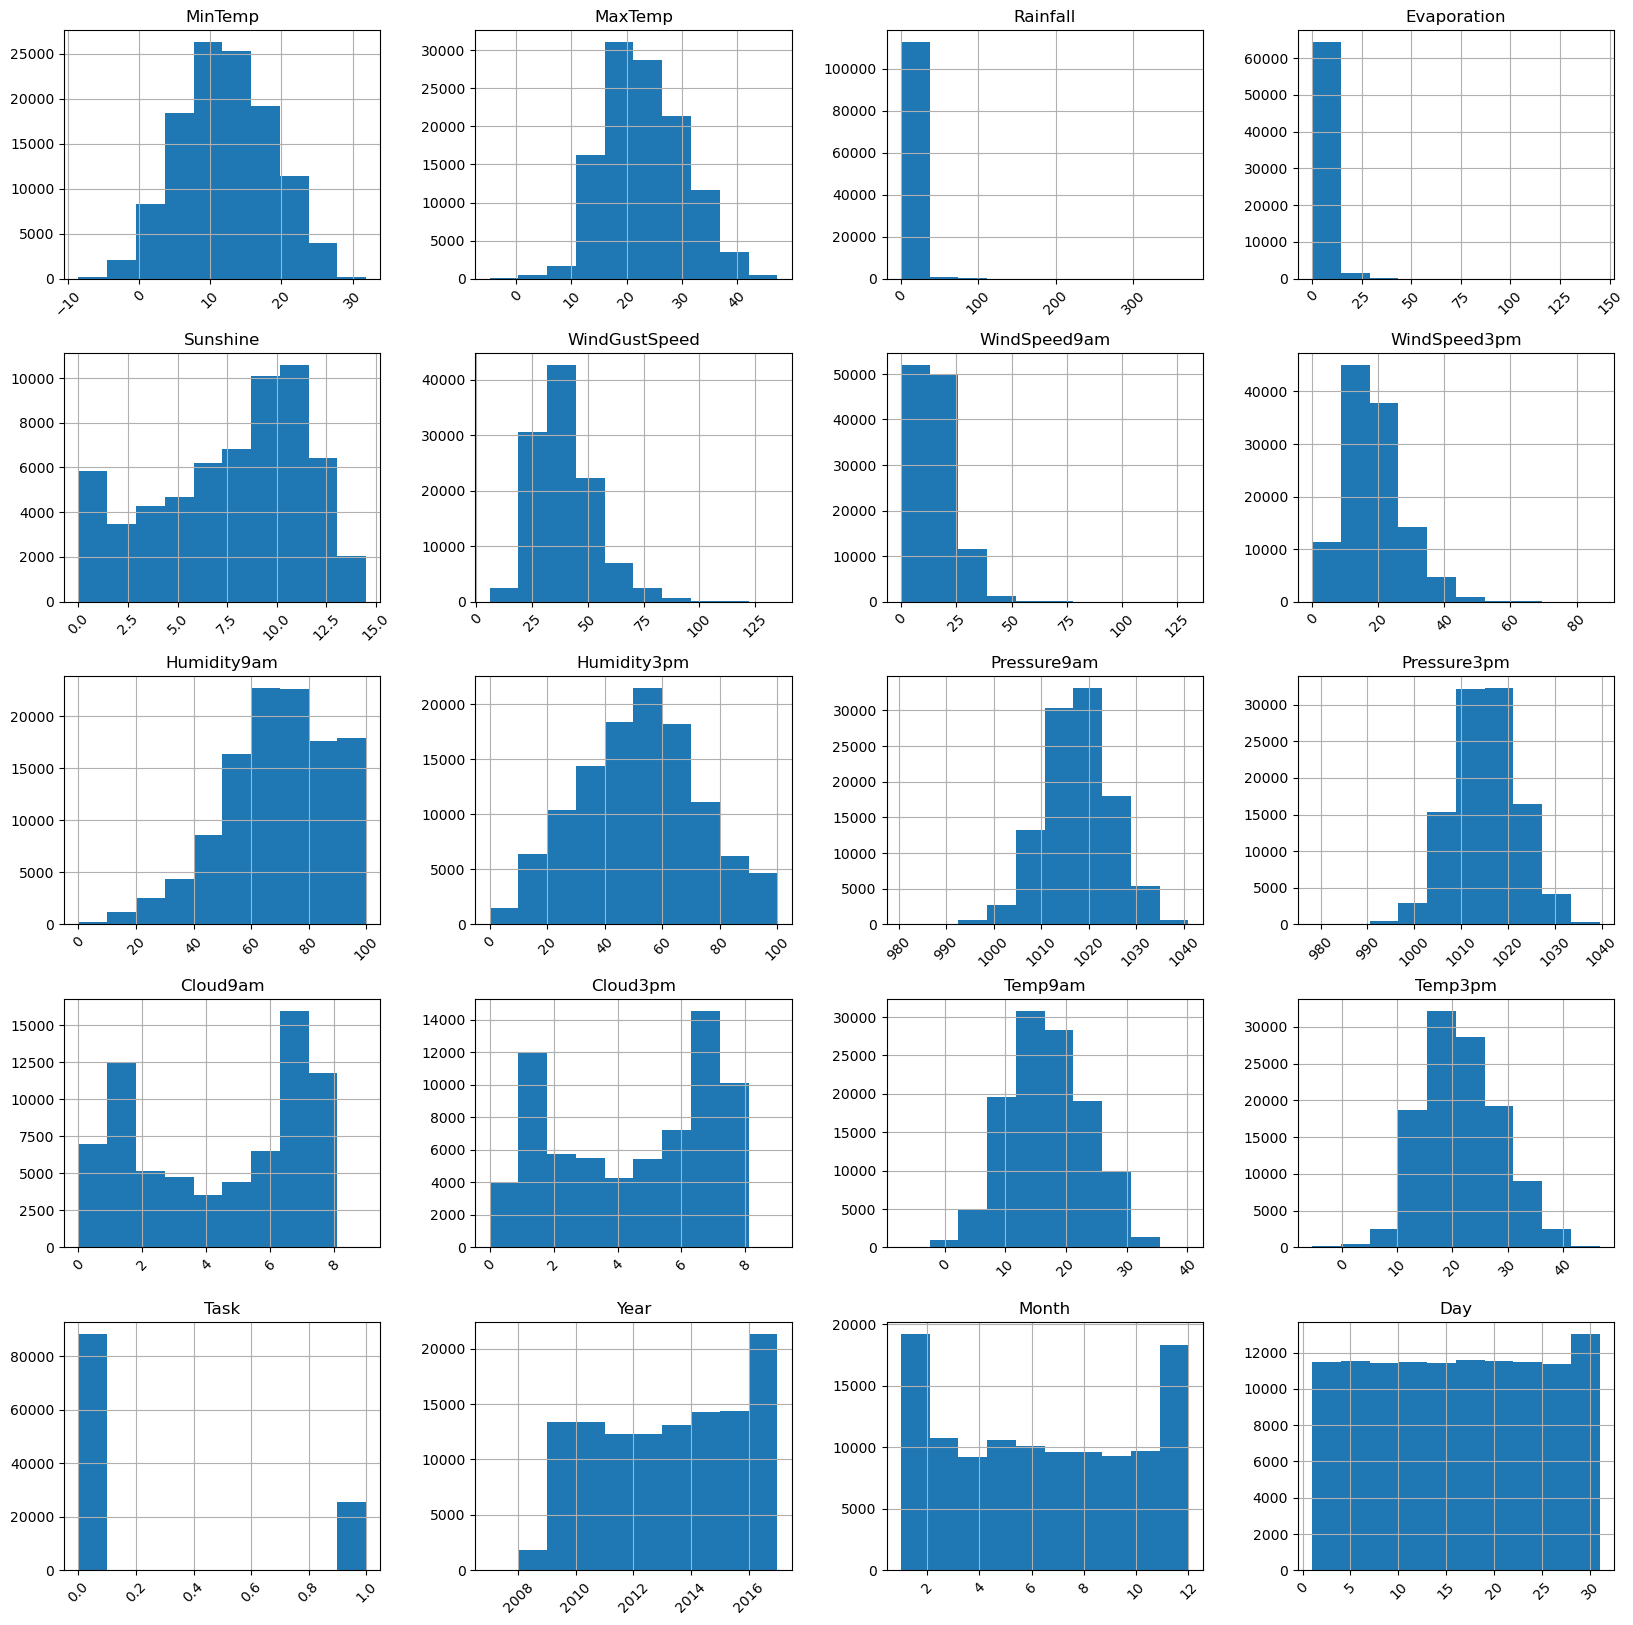

In [11]:
train_df.hist(figsize=(20, 20), xrot=45)
plt.savefig('numerical_cols_hist.png')

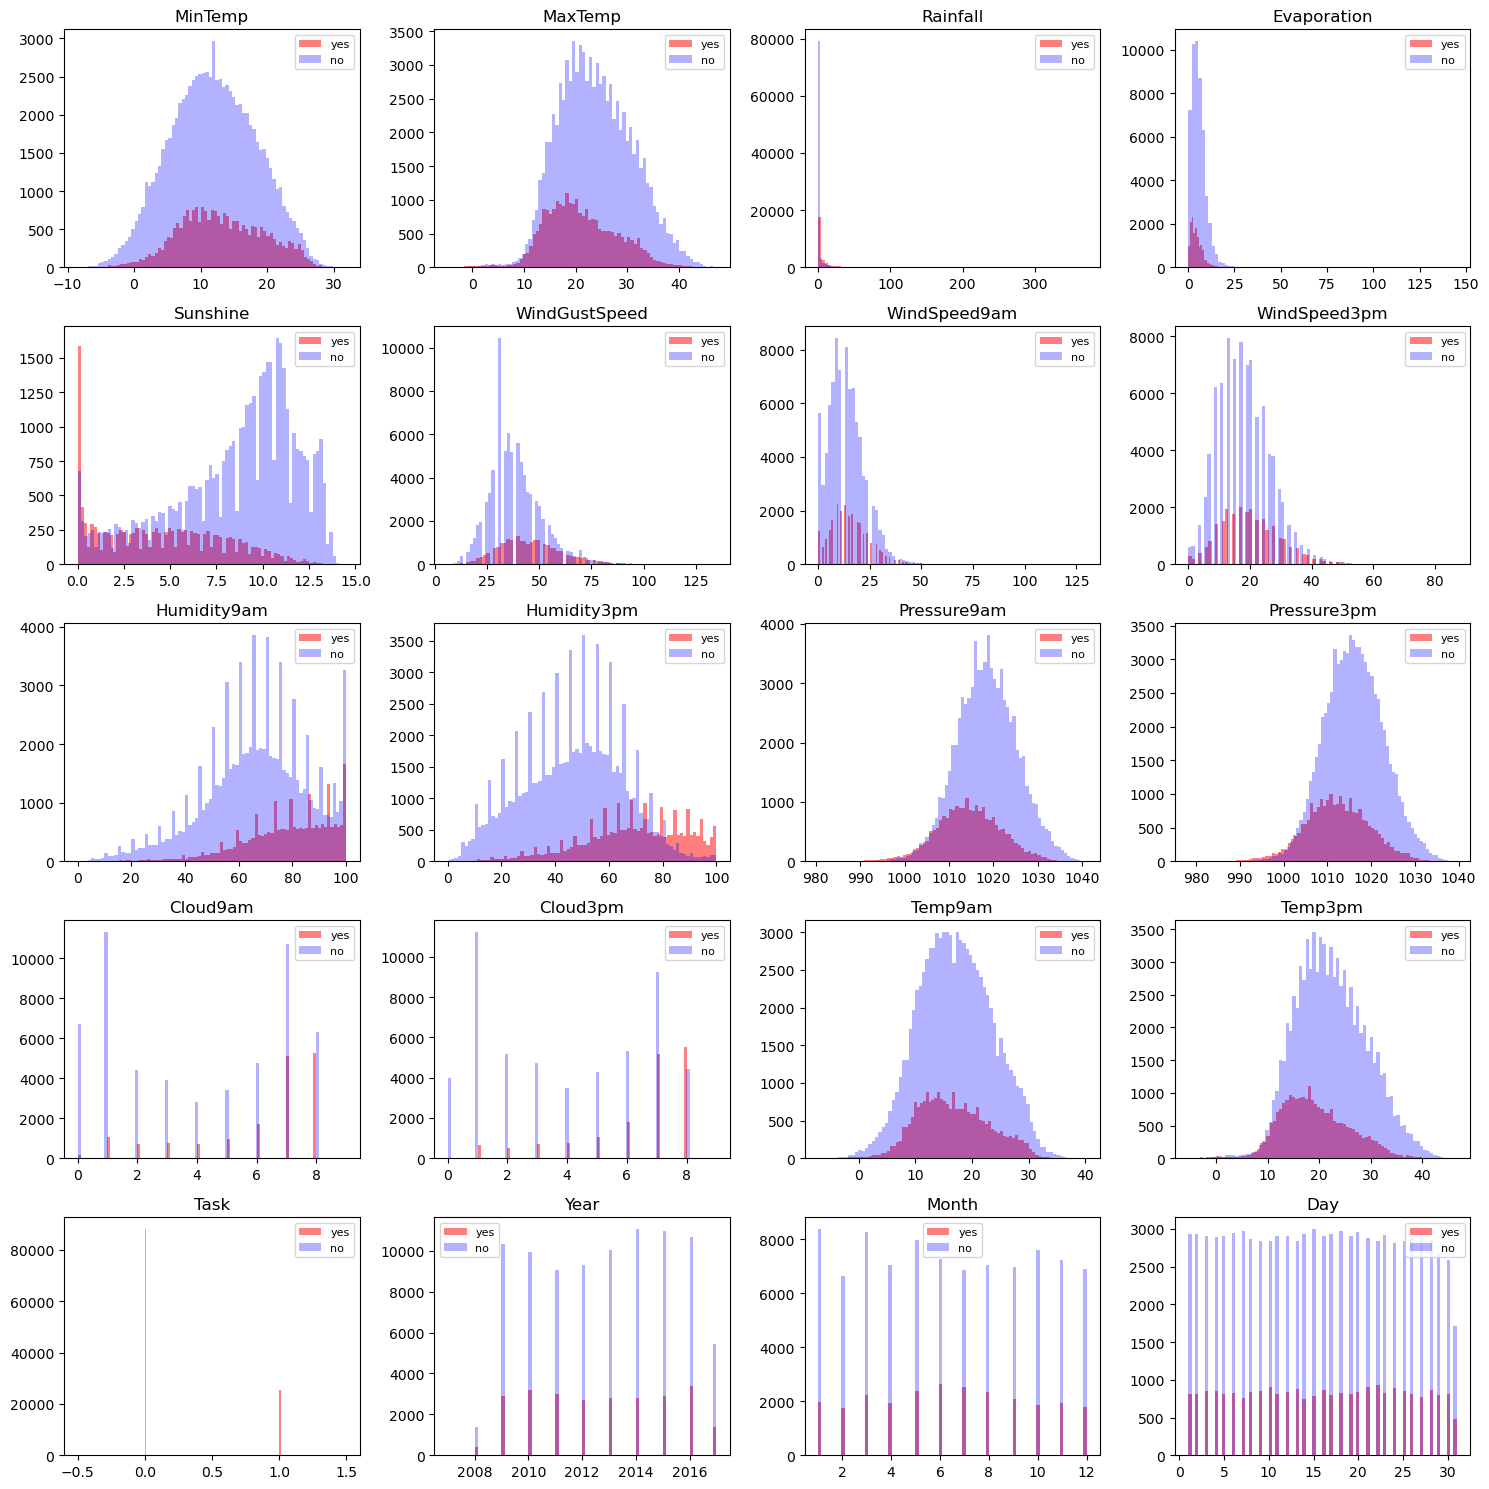

In [12]:
import numpy as np
import matplotlib.pyplot as plt
_, axes = plt.subplots(5,4, figsize=(15, 15))
yes = train_df[train_df["Task"]==1]
no = train_df[train_df["Task"]==0]

ax = axes.ravel()
# flatten the 2D array
num_columns = train_df.select_dtypes(include=['number']).columns

count = 0
for i in num_columns:                   # for each of the 30 features
    bins = 80
    ax[count].hist(yes.loc[:,i], bins=bins, color='r', alpha=.5)
    ax[count].hist(no.loc[:,i], bins=bins, color='b', alpha=0.3)
    ax[count].set_title(i, fontsize=12)
    ax[count].legend(['yes','no'], loc='best', fontsize=8)
    count += 1

plt.tight_layout()
plt.savefig('carAndMeanoftask01.png')

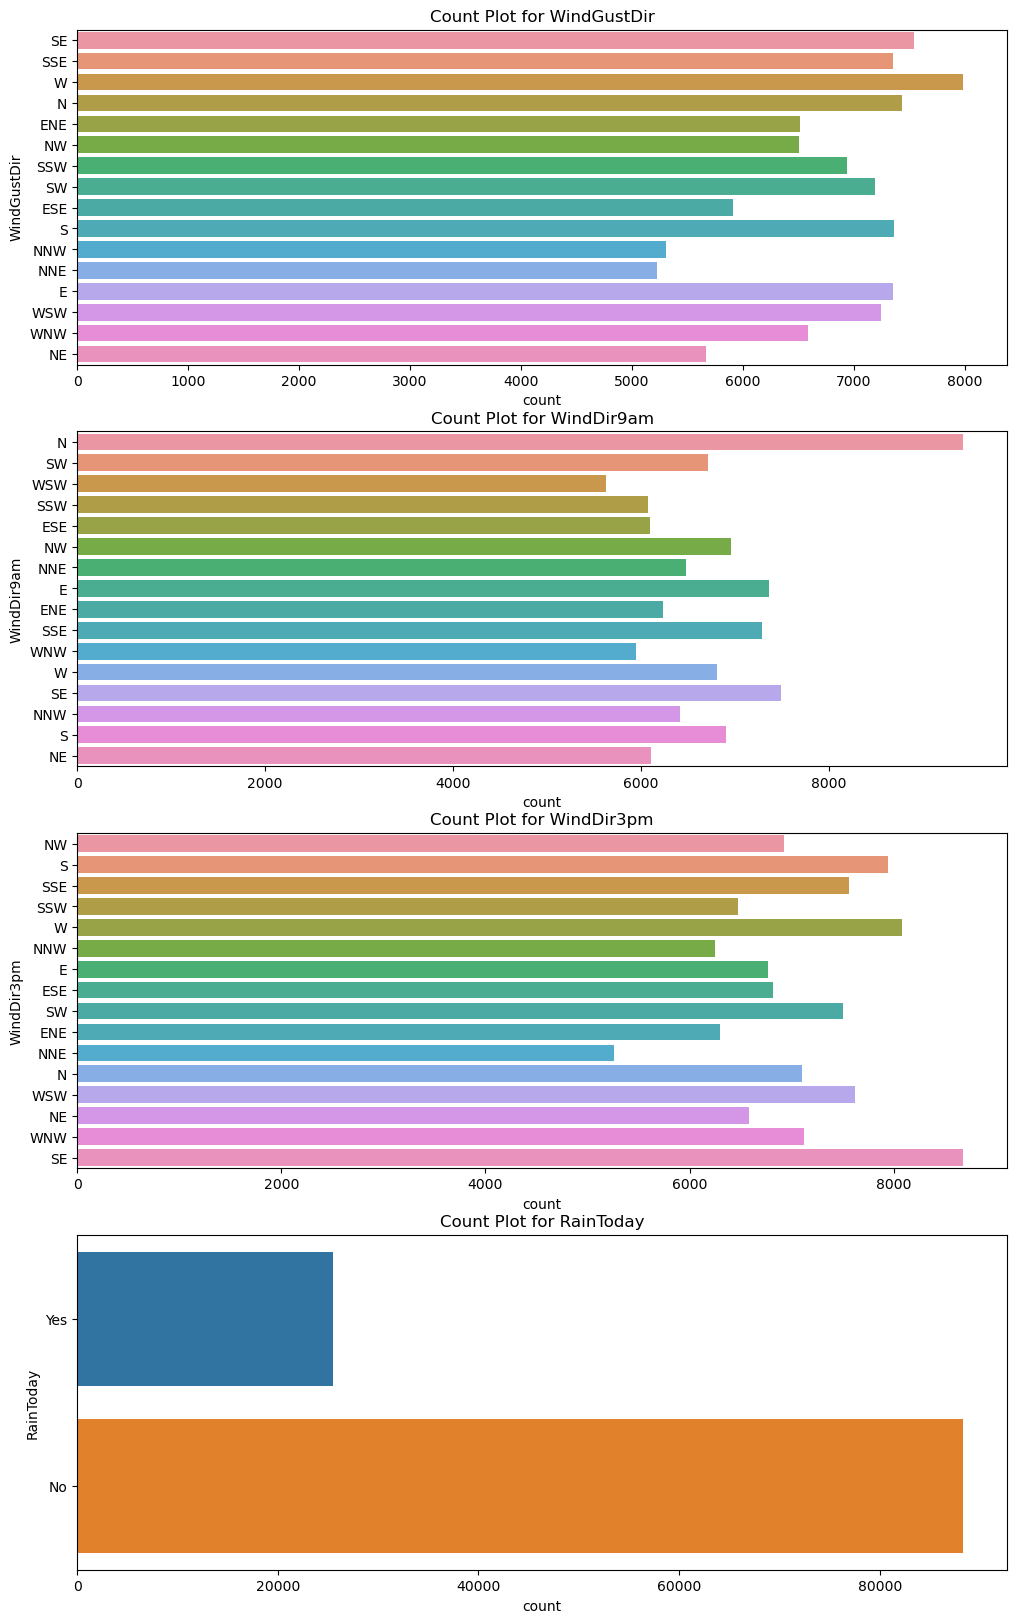

In [13]:
categorical_columns = train_df.select_dtypes(include=['category', 'object']).columns

categorical_columns = categorical_columns.drop("Location")
# Set up a grid of subplots
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, 20))

# Iterate through categorical columns and create count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(y=column, data=train_df, ax=axes[i])
    axes[i].set_title(f"Count Plot for {column}")

# Adjust layout and show the plots
plt.savefig('cat_cols_hist.png')

In [14]:
# Adding new column Counts, this contains the fraction of value for which Task of the Location is 1.
train_df["Counts"] = train_df["Location"].apply(lambda x: counts[x]/totCounts[x])

In [15]:
column_to_check = 'Task'
train_df = train_df.dropna(subset=[column_to_check])

In [16]:
train_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Task,Year,Month,Day,Counts
0,Navi-Mumbai,14.5,17.8,14.2,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,16.2,NaN,Yes,1.0,2017,4,24,0.303055
1,Kota,24.6,39.5,0.0,12.0,NaN,SE,31.0,N,NW,...,2.0,4.0,30.1,39.2,No,0.0,2013,10,11,0.162162
2,Vadodara,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,S,...,7.0,3.0,17.3,24.5,No,0.0,2012,2,18,0.215743
3,Kanpur,18.3,26.6,0.0,NaN,NaN,SE,28.0,WSW,SSE,...,6.0,NaN,23.0,25.4,No,0.0,2012,2,18,0.230962
4,Srinagar,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,SSW,...,NaN,NaN,14.4,18.3,No,0.0,2011,10,11,0.216069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,Navi-Mumbai,10.0,17.2,0.0,9.6,8.8,NaN,NaN,SW,SSE,...,7.0,1.0,13.8,16.0,No,0.0,2013,10,22,0.303055
116364,Ranchi,7.7,21.1,0.0,1.4,8.9,E,35.0,NE,SSE,...,1.0,1.0,12.3,20.1,No,0.0,2015,5,29,0.188578
116365,Dhanbad,7.6,21.7,0.0,6.0,11.2,SE,39.0,NE,ESE,...,2.0,2.0,13.7,21.2,No,0.0,2012,3,17,0.202490
116366,Vijayawada,8.8,14.8,0.0,1.2,2.0,NNE,56.0,N,NNE,...,3.0,7.0,14.1,13.6,No,0.0,2014,6,23,0.243390


In [17]:

null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages

Location          0.000000
MinTemp           0.448308
MaxTemp           0.229428
Rainfall          0.981004
Evaporation      42.880249
Sunshine         47.754503
WindGustDir       6.578704
WindGustSpeed     6.539148
WindDir9am        7.026134
WindDir3pm        2.685455
WindSpeed9am      0.951996
WindSpeed3pm      1.871467
Humidity9am       1.255263
Humidity3pm       2.566785
Pressure9am       9.883000
Pressure3pm       9.869815
Cloud9am         37.791510
Cloud3pm         40.212375
Temp9am           0.639059
Temp3pm           1.941790
RainToday         0.981004
Task              0.000000
Year              0.000000
Month             0.000000
Day               0.000000
Counts            0.000000
dtype: float64

In [18]:
# Dropping these columns as they contain nearly 40% null values
to_drop = ['Evaporation', 'Sunshine', 'Cloud9am','Cloud3pm',]
train_df.drop(to_drop,inplace=True,axis=1)
test_df.drop(to_drop,inplace=True,axis=1)

In [19]:
# Finding dataframe for each of the seasons
spring_df = train_df[train_df["Month"].isin([3, 4, 5])]
summer_df = train_df[train_df["Month"].isin([6,7,8])]
fall_df = train_df[train_df["Month"].isin([9,10,11])]
winter_df = train_df[train_df["Month"].isin([12,1,2])]

seasons = [spring_df,summer_df,fall_df,winter_df]
(spring_df)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Task,Year,Month,Day,Counts
0,Navi-Mumbai,14.5,17.8,14.2,NaN,NaN,NaN,NaN,0.0,NaN,...,1024.1,1022.5,16.2,NaN,Yes,1.0,2017,4,24,0.303055
9,Varanasi,22.3,27.6,11.6,SE,43.0,SSW,SSE,19.0,24.0,...,1016.4,1015.2,22.7,24.5,Yes,1.0,2016,4,14,0.171746
18,Ghaziabad,12.3,22.1,0.6,N,63.0,N,N,26.0,31.0,...,1018.8,1015.2,15.8,20.3,No,0.0,2014,5,26,0.198753
23,Patna,7.2,19.2,0.4,E,52.0,NW,E,6.0,33.0,...,1025.2,1025.1,12.3,17.9,No,0.0,2011,3,5,0.211948
26,Meerut,12.5,21.1,0.4,SE,37.0,SE,ESE,13.0,15.0,...,1025.2,1023.3,13.0,20.1,No,0.0,2014,3,25,0.304384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116344,Vijayawada,5.5,16.3,0.0,NNW,28.0,NNW,E,17.0,4.0,...,1021.2,1017.7,8.1,14.8,No,0.0,2010,5,17,0.243390
116349,Dhanbad,13.0,24.6,0.4,ESE,41.0,SE,ESE,20.0,19.0,...,1021.8,1019.5,14.5,22.7,No,0.0,2011,3,14,0.202490
116364,Ranchi,7.7,21.1,0.0,E,35.0,NE,SSE,15.0,9.0,...,1026.7,1023.0,12.3,20.1,No,0.0,2015,5,29,0.188578
116365,Dhanbad,7.6,21.7,0.0,SE,39.0,NE,ESE,6.0,17.0,...,1021.1,1019.6,13.7,21.2,No,0.0,2012,3,17,0.202490


In [20]:
# Filling the null values of the numerical colums with the median of the season it belongs to and
#  categorical columns with the mode of season it  belongs to
num_columns = train_df.select_dtypes(include=['number']).columns
print(num_columns)
for i in seasons:
    i[num_columns] = i[num_columns].fillna(i[num_columns].median())

    categorical_columns = i.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        print(column)
        mode_value = i[column].mode().iloc[0]
        i[column].fillna(mode_value, inplace=True)

train_df

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Task', 'Year', 'Month', 'Day',
       'Counts'],
      dtype='object')
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Task,Year,Month,Day,Counts
0,Navi-Mumbai,14.5,17.8,14.2,NaN,NaN,NaN,NaN,0.0,NaN,...,1024.1,1022.5,16.2,NaN,Yes,1.0,2017,4,24,0.303055
1,Kota,24.6,39.5,0.0,SE,31.0,N,NW,9.0,17.0,...,1011.8,1006.6,30.1,39.2,No,0.0,2013,10,11,0.162162
2,Vadodara,14.7,26.6,0.2,SSE,30.0,SW,S,7.0,11.0,...,1018.2,1015.4,17.3,24.5,No,0.0,2012,2,18,0.215743
3,Kanpur,18.3,26.6,0.0,SE,28.0,WSW,SSE,11.0,22.0,...,1017.0,1016.5,23.0,25.4,No,0.0,2012,2,18,0.230962
4,Srinagar,11.4,19.3,0.6,W,31.0,SW,SSW,13.0,19.0,...,1018.6,1017.1,14.4,18.3,No,0.0,2011,10,11,0.216069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,Navi-Mumbai,10.0,17.2,0.0,NaN,NaN,SW,SSE,2.0,15.0,...,1027.2,1025.7,13.8,16.0,No,0.0,2013,10,22,0.303055
116364,Ranchi,7.7,21.1,0.0,E,35.0,NE,SSE,15.0,9.0,...,1026.7,1023.0,12.3,20.1,No,0.0,2015,5,29,0.188578
116365,Dhanbad,7.6,21.7,0.0,SE,39.0,NE,ESE,6.0,17.0,...,1021.1,1019.6,13.7,21.2,No,0.0,2012,3,17,0.202490
116366,Vijayawada,8.8,14.8,0.0,NNE,56.0,N,NNE,19.0,28.0,...,998.7,990.9,14.1,13.6,No,0.0,2014,6,23,0.243390


In [21]:
train_df = pd.concat([seasons[0],seasons[1],seasons[2],seasons[3]])
train_df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Task,Year,Month,Day,Counts
0,Navi-Mumbai,14.5,17.8,14.2,SE,35.0,E,SE,0.0,17.0,...,1024.1,1022.5,16.2,21.8,Yes,1.0,2017,4,24,0.303055
9,Varanasi,22.3,27.6,11.6,SE,43.0,SSW,SSE,19.0,24.0,...,1016.4,1015.2,22.7,24.5,Yes,1.0,2016,4,14,0.171746
18,Ghaziabad,12.3,22.1,0.6,N,63.0,N,N,26.0,31.0,...,1018.8,1015.2,15.8,20.3,No,0.0,2014,5,26,0.198753
23,Patna,7.2,19.2,0.4,E,52.0,NW,E,6.0,33.0,...,1025.2,1025.1,12.3,17.9,No,0.0,2011,3,5,0.211948
26,Meerut,12.5,21.1,0.4,SE,37.0,SE,ESE,13.0,15.0,...,1025.2,1023.3,13.0,20.1,No,0.0,2014,3,25,0.304384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116348,Rajkot,21.5,31.3,0.0,ENE,22.0,S,ENE,4.0,11.0,...,1017.3,1013.4,27.4,30.3,No,0.0,2012,2,19,0.218786
116351,Vadodara,11.0,21.5,0.0,S,39.0,SSW,S,20.0,26.0,...,1009.9,1010.3,16.5,19.2,No,0.0,2011,1,5,0.215743
116353,Mumbai,20.1,33.0,0.0,ENE,61.0,SE,SSE,17.0,22.0,...,1013.8,1010.6,26.7,32.5,No,1.0,2011,1,9,0.195374
116358,Gwalior,7.5,29.3,0.0,ENE,33.0,ENE,ESE,19.0,19.0,...,1013.4,1011.3,19.9,27.5,No,0.0,2016,2,4,0.157251


In [22]:
train_df['Task'].value_counts()
sum = len(train_df)

In [23]:
train_df['Month'] = train_df['Month'].apply(lambda x: np.cos(2*np.pi*(x - 1))/11).astype('float64')
train_df['Day'] = train_df['Day'].apply(lambda x: np.cos(2*np.pi*(x - 1))/30).astype('float64')

In [24]:
# Shuffling the rows of train_df after concatenating the seasons 
train_df = train_df.sample(frac = 1)
train_df.reset_index(drop=True, inplace=True)


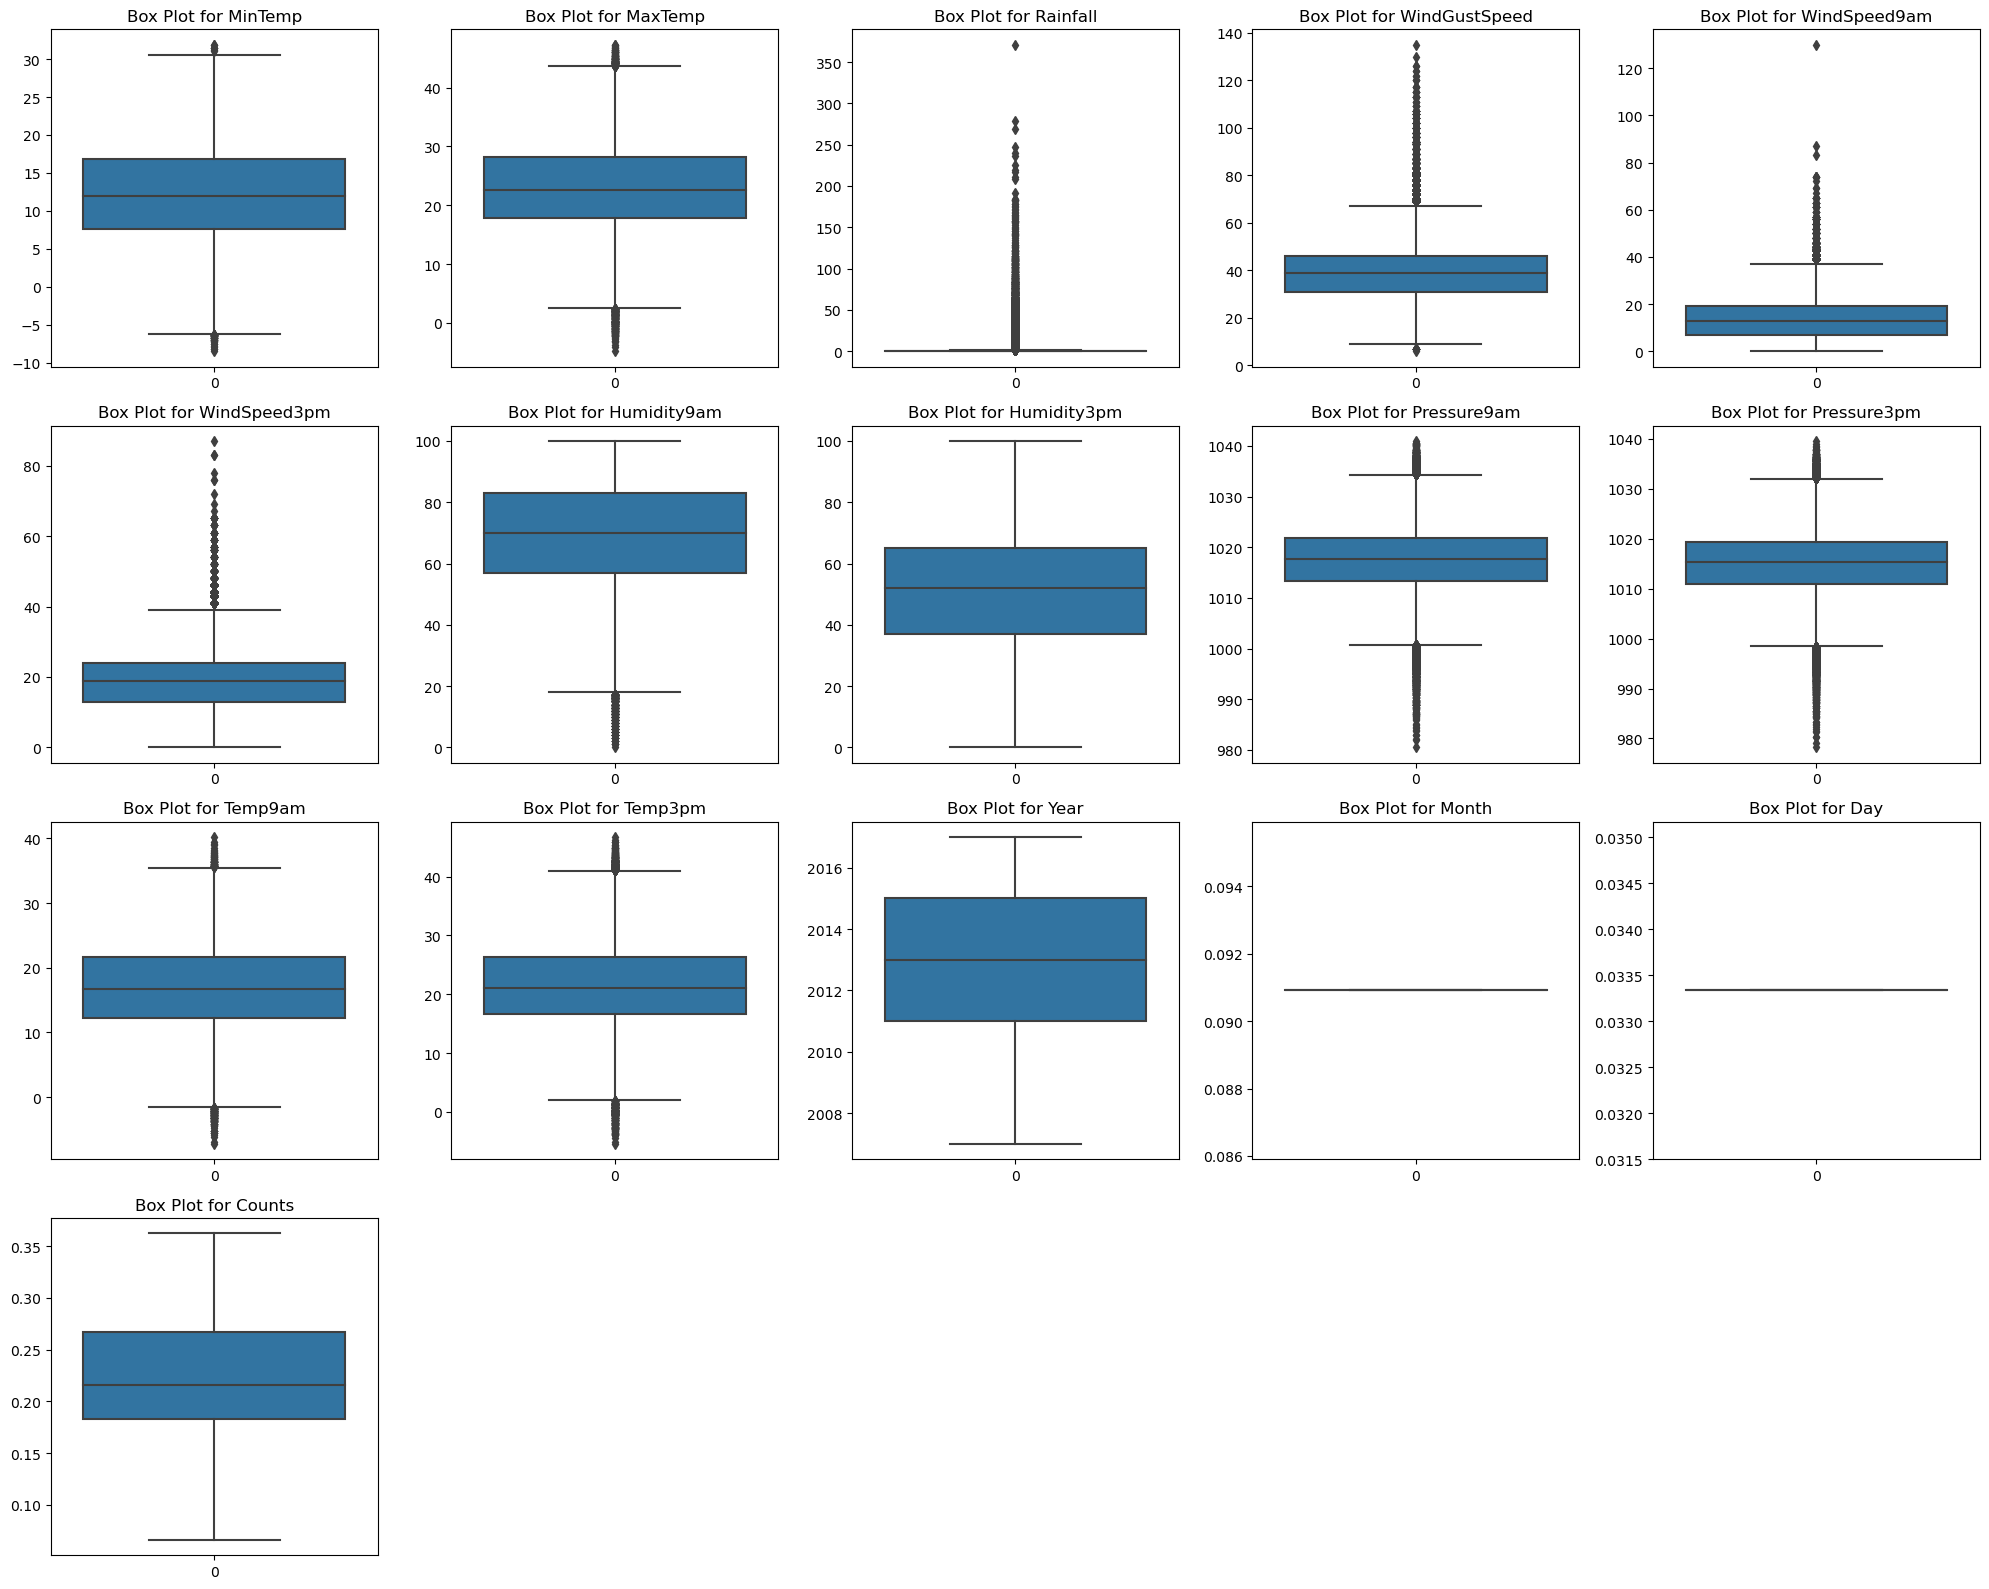

In [25]:
numerical_columns = train_df.select_dtypes(include=['number']).columns
column_to_remove = 'Task'

# # Remove the specified column from numerical_columns
numerical_columns = [col for col in numerical_columns if col != column_to_remove]
num_plots = len(numerical_columns)
num_rows = num_plots // 5 + (num_plots % 5 > 0)  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))

for i, column in enumerate(numerical_columns):
    row_index, col_index = divmod(i, 5)
    sns.boxplot(data=train_df[column], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Box Plot for {column}')

# Remove any empty subplots in the last row
if num_plots % 5 > 0:
    for j in range(num_plots % 5, 5):
        fig.delaxes(axes[num_rows - 1, j])

plt.tight_layout()
plt.savefig('outlier.png')


In [26]:
class outlierremoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range=q3-q1
        self.upper_whisker=q3+inter_quartile_range*1.5
        self.lower_whisker=q1-inter_quartile_range*1.5

    def remove(self, row):
        if(row<=self.upper_whisker and row>=self.lower_whisker):
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker


Outlier Removal

In [27]:
for i in numerical_columns:
    if(i!='Task'):
        remover = outlierremoval(train_df[i])
        train_df[i]=train_df[i].apply(remover.remove)

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113761 entries, 0 to 113760
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       113761 non-null  object 
 1   MinTemp        113761 non-null  float64
 2   MaxTemp        113761 non-null  float64
 3   Rainfall       113761 non-null  float64
 4   WindGustDir    113761 non-null  object 
 5   WindGustSpeed  113761 non-null  float64
 6   WindDir9am     113761 non-null  object 
 7   WindDir3pm     113761 non-null  object 
 8   WindSpeed9am   113761 non-null  float64
 9   WindSpeed3pm   113761 non-null  float64
 10  Humidity9am    113761 non-null  float64
 11  Humidity3pm    113761 non-null  float64
 12  Pressure9am    113761 non-null  float64
 13  Pressure3pm    113761 non-null  float64
 14  Temp9am        113761 non-null  float64
 15  Temp3pm        113761 non-null  float64
 16  RainToday      113761 non-null  object 
 17  Task           113761 non-nul

Converting train_df to have equal number of Task 0's and 1's

In [29]:
category0 = train_df[train_df['Task'] == 0]
category1 = train_df[train_df['Task'] == 1]

In [30]:
diff = len(category0) - len(category1)
class_0_size = len(category0)
class_1_size = len(category1)
diff

62847

In [31]:
# Here we decrease the number of 0s to bring it to half of total number of rows
num_rows_to_drop = int((class_0_size - sum/2) )

# Randomly sample the rows to drop
rows_to_drop = category0.sample(n=num_rows_to_drop, random_state=42)

# Create a new DataFrame excluding the sampled rows
category0 = category0.drop(rows_to_drop.index)

category0.reset_index(drop=True, inplace=True)
category0['Task'].value_counts()

Task
0.0    56881
Name: count, dtype: int64

In [32]:
diff = len(category0) - len(category1)
class_0_size = len(category0)
class_1_size = len(category1)
diff


31424

In [33]:
# Ḥere we increase the number of 1's to half of total number of rows
category1_oversampled = category1.sample(n=class_0_size, replace=True,random_state=42)

# Concatenate the oversampled class 1 with the original class 0
train_df = pd.concat([category0, category1_oversampled])
train_df['Task'].value_counts()

Task
0.0    56881
1.0    56881
Name: count, dtype: int64

In [35]:
dir = {'N': 0, 'NNE': 22.5, 'NE': 45.0, 'ENE': 67.5, 'E': 90.0, 'ESE': 112.5, 'SE': 135.0, 'SSE': 157.5, 'S':
180.0, 'SSW': 202.5, 'SW': 225.0, 'WSW': 247.5, 'W': 270.0, 'WNW': 292.5, 'NW': 315.0, 'NNW':
337.5}
dir_col = ['WindGustDir','WindDir9am','WindDir3pm']
for i in dir_col:
    train_df[i] = train_df[i].apply(lambda x: np.cos(2*np.pi*dir[x])/360).astype('float64')

In [36]:
train_df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
Task             0
Year             0
Month            0
Day              0
Counts           0
dtype: int64

In [37]:
train_df = train_df.sample(frac = 1)
train_df.reset_index(drop=True, inplace=True)


In [38]:
train_df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
Task             0
Year             0
Month            0
Day              0
Counts           0
dtype: int64

In [39]:
X = train_df.drop('Task', axis=1)
Y = train_df['Task']

In [40]:
# !pip install category_encoders

In [41]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=categorical_columns)
X = encoder.fit_transform(X, Y)



In [42]:
train_df = X.copy()
train_df["Task"] = Y

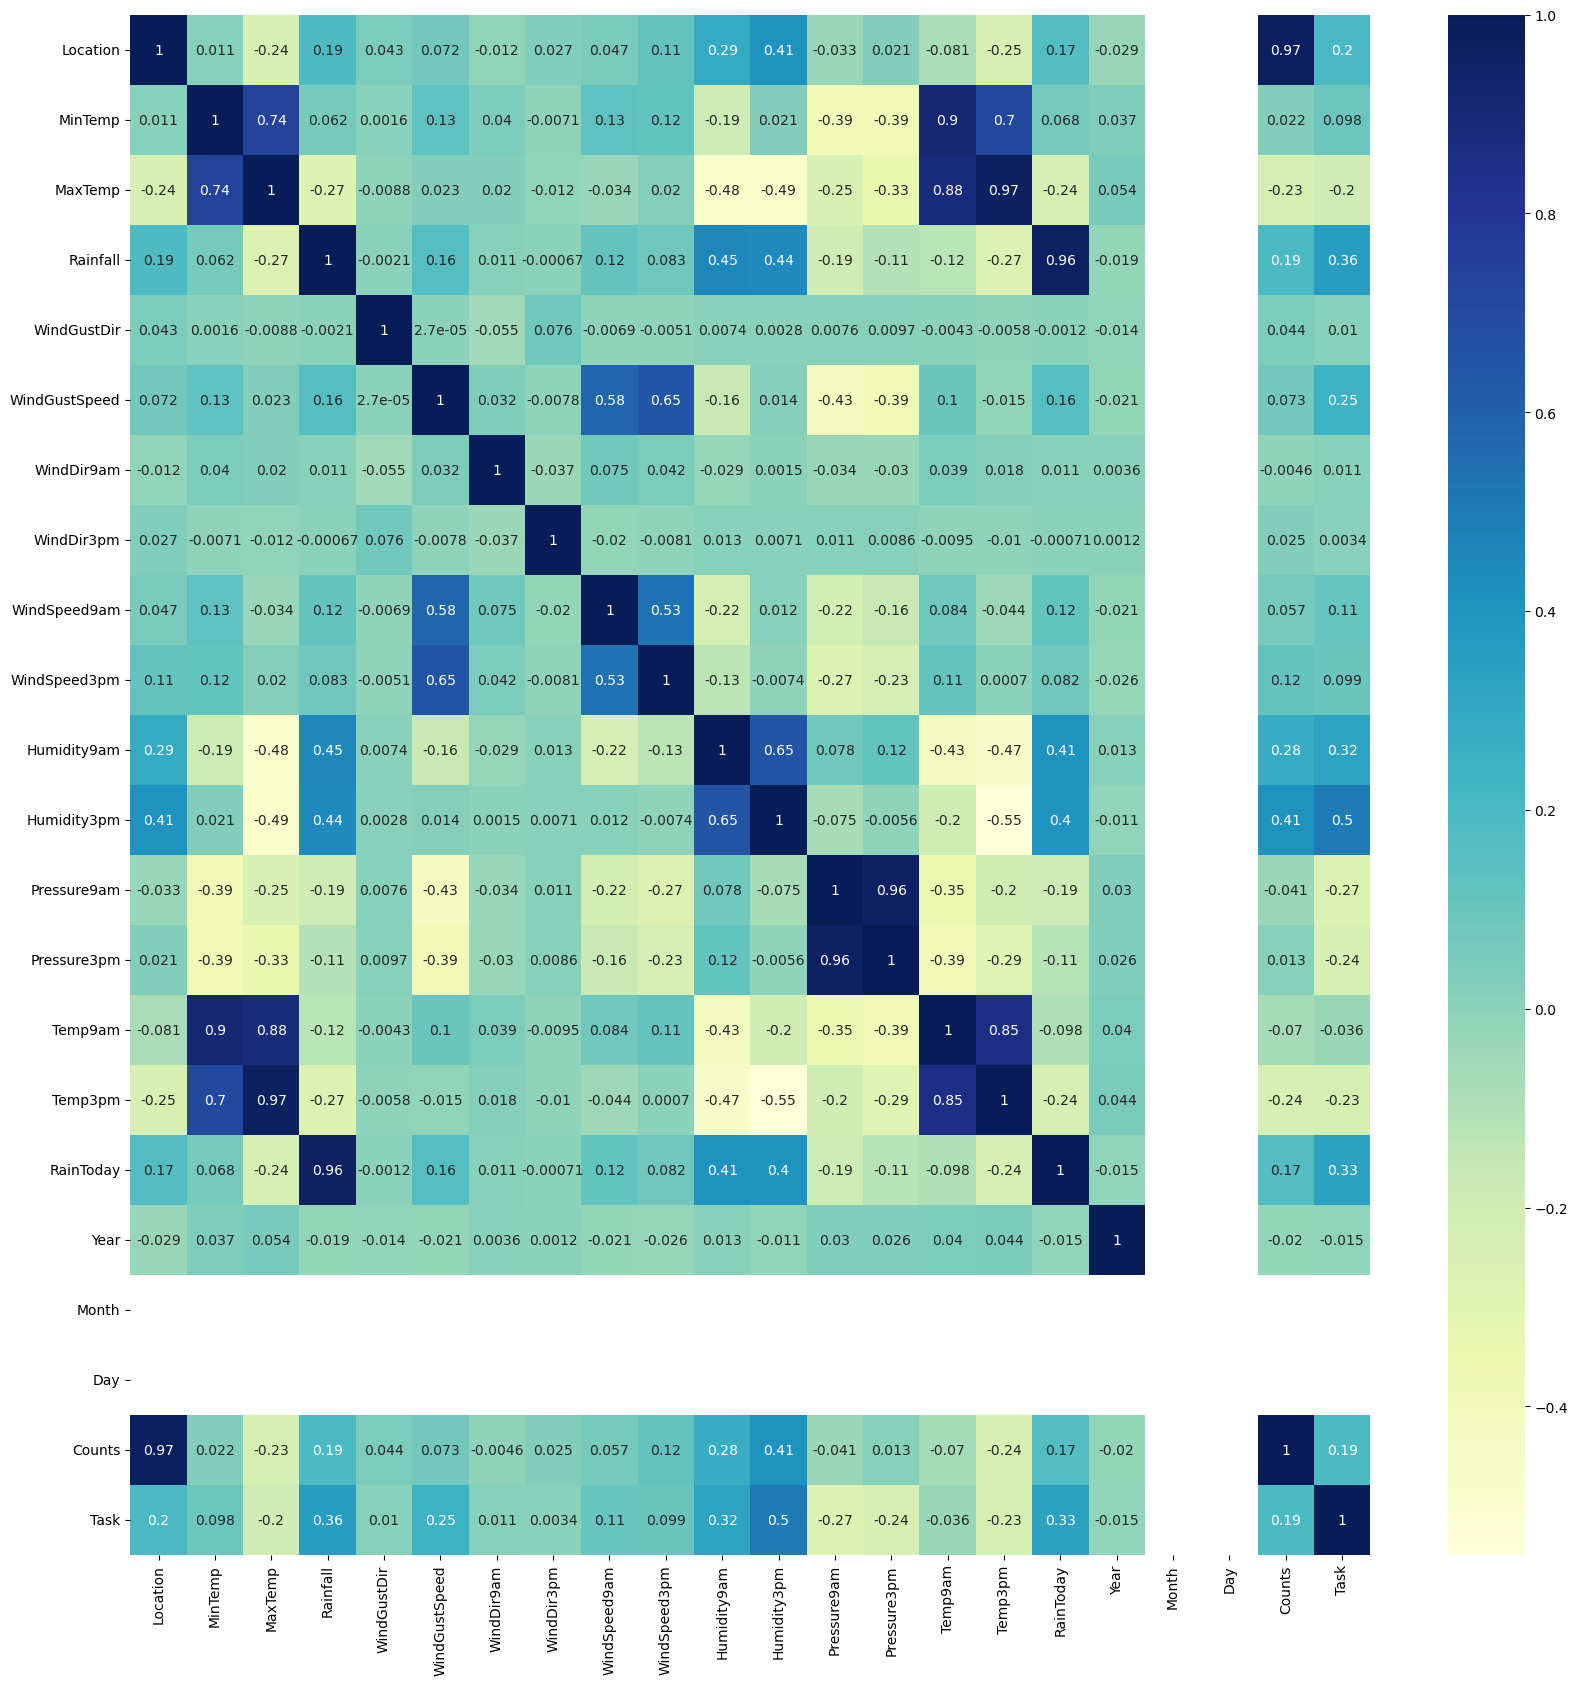

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)
plt.savefig("corellation.png")

In [44]:
X

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,Counts
0,0.439414,5.1,22.6,0.0,0.504440,50.0,0.495076,0.498168,4.0,11.0,...,36.0,1015.7,1012.7,14.1,20.5,0.388655,2013,0.090909,0.033333,0.185200
1,0.462629,8.9,34.3,0.0,0.494321,22.0,0.506349,0.498168,4.0,4.0,...,22.0,1014.9,1009.4,18.8,33.2,0.388655,2013,0.090909,0.033333,0.195374
2,0.488597,19.5,26.9,1.5,0.504440,28.0,0.506349,0.498168,2.0,13.0,...,72.0,1016.8,1015.2,23.1,24.3,0.751331,2010,0.090909,0.033333,0.218786
3,0.565468,23.8,32.0,1.5,0.494321,33.0,0.506349,0.501550,6.0,6.0,...,91.0,1009.5,1007.2,27.9,27.3,0.751331,2017,0.090909,0.033333,0.267969
4,0.440072,14.8,40.6,0.0,0.494321,61.0,0.506349,0.501550,13.0,30.0,...,8.0,1005.5,1002.0,24.9,37.6,0.388655,2013,0.090909,0.033333,0.187656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113757,0.429138,13.2,24.9,0.0,0.494321,39.0,0.506349,0.498168,13.0,19.0,...,34.0,1021.0,1017.4,17.5,24.2,0.388655,2011,0.090909,0.033333,0.167506
113758,0.410909,25.3,31.3,1.2,0.494321,35.0,0.495076,0.501550,9.0,11.0,...,70.0,1010.1,1007.5,25.7,29.7,0.751331,2009,0.090909,0.033333,0.171746
113759,0.608600,7.1,29.5,0.0,0.504440,50.0,0.506349,0.501550,22.0,31.0,...,11.0,1021.3,1015.5,19.3,27.5,0.388655,2012,0.090909,0.033333,0.303550
113760,0.410909,25.4,30.6,0.6,0.494321,43.0,0.495076,0.498168,11.0,24.0,...,76.0,1010.8,1008.1,27.7,28.8,0.388655,2010,0.090909,0.033333,0.171746


In [45]:
Y

0         1.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
113757    0.0
113758    1.0
113759    0.0
113760    1.0
113761    1.0
Name: Task, Length: 113762, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification

X_train = X
y_train = Y

In [47]:
import xgboost as xgb

models = []
np.random.seed(1)
for i in range(10):
    model = xgb.XGBClassifier(
        learning_rate=0.05,
        n_estimators=750 + (0 if (i == 0) else np.random.randint(-20, 20)),
        max_depth=8,
        min_child_weight=1,
        gamma=0.5,
        subsample=0.6,
        colsample_bytree=1,
        reg_alpha=0.1,
        random_state=42,
        reg_lambda=2
    )
    model.fit(X_train, y_train) 
    models.append(model)

In [48]:
test_df['Date'] = pd.to_datetime(test_df['Date'])

test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day


test_df.drop(['Date'], axis=1, inplace=True)

In [49]:
test_df["Counts"] = test_df["Location"].apply(lambda x: counts[x]/totCounts[x])

In [50]:
ids = test_df["ID"]
test_df.drop("ID", inplace=True, axis=1)

In [51]:
# Create DataFrames for each season
spring_df = test_df[test_df["Month"].isin([3, 4, 5])]
summer_df = test_df[test_df["Month"].isin([6,7,8])]
fall_df = test_df[test_df["Month"].isin([9,10,11])]
winter_df = test_df[test_df["Month"].isin([12,1,2])]

seasons = [spring_df,summer_df,fall_df,winter_df]
(spring_df)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,Counts
0,Aurangabad,15.0,18.9,4.2,NNW,54.0,NNW,NW,24.0,31.0,...,64.0,1005.2,1003.7,17.3,17.6,Yes,2012,4,22,0.303550
1,Sydney,13.1,26.8,0.0,NaN,NaN,W,WNW,22.0,15.0,...,22.0,1013.0,1009.0,16.9,25.9,No,2008,3,30,0.252383
2,Pune,18.1,32.2,0.0,NE,30.0,NaN,NE,0.0,17.0,...,51.0,1019.2,1014.6,20.9,31.6,No,2013,3,27,0.182358
6,Nagpore,17.7,22.3,NaN,SSE,54.0,NaN,S,NaN,37.0,...,80.0,1012.8,1014.3,NaN,17.0,NaN,2010,4,25,0.230864
7,Pune,18.4,25.7,2.6,NE,24.0,NaN,NNE,0.0,2.0,...,64.0,1026.5,1023.3,19.8,24.2,Yes,2014,3,4,0.182358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28422,Thane,5.0,23.0,0.0,N,19.0,NaN,NNW,0.0,6.0,...,32.0,1032.6,1028.3,13.2,21.9,No,2016,4,25,0.185200
28425,Guwahati,17.2,32.3,0.0,E,43.0,E,SE,20.0,24.0,...,18.0,1019.7,1015.8,24.3,32.0,No,2013,4,8,0.074781
28426,Chennai,17.4,22.8,35.2,NaN,NaN,SE,SE,28.0,19.0,...,92.0,NaN,NaN,21.4,20.8,Yes,2009,3,31,0.242834
28430,Coimbatore,12.7,20.6,0.8,WNW,31.0,NNW,WSW,15.0,11.0,...,83.0,1020.4,1020.4,15.9,19.2,No,2013,4,23,0.318828


In [52]:
# These functions return median and mode for the season test_df belongs to
def getMedian(row, idx, i):
    row = row.to_dict()
    x = row[i]
    month = row["Month"]

    if (not pd.isna(x)):
        return x
    if(month in [3,4,5]):
        return seasons[0].loc[: ,i].median()
    elif(month in [6,7,8]):
        return seasons[1].loc[:,i].median()
    elif(month in [9,10,11]):
        return seasons[2].loc[:,i].median()
    else:
        return seasons[3].loc[:,i].median()
    return

def getMode(row, idx, i):
    row = row.to_dict()
    x = row[i]
    month = row["Month"]
    if (not pd.isna(x)):
        return x
    if (not pd.isna(x)):
        return x
    if(month in [3,4,5]):
        return seasons[0].loc[: ,i].mode().iloc[0]
    elif(month in [6,7,8]):
        return seasons[1].loc[:,i].mode().iloc[0]
    elif(month in [9,10,11]):
        return seasons[2].loc[:,i].mode().iloc[0]
    else:
        return seasons[3].loc[:,i].mode().iloc[0]
    return

In [53]:
test_df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,Counts
0,Aurangabad,15.0,18.9,4.2,NNW,54.0,NNW,NW,24.0,31.0,...,64.0,1005.2,1003.7,17.3,17.6,Yes,2012,4,22,0.303550
1,Sydney,13.1,26.8,0.0,NaN,NaN,W,WNW,22.0,15.0,...,22.0,1013.0,1009.0,16.9,25.9,No,2008,3,30,0.252383
2,Pune,18.1,32.2,0.0,NE,30.0,NaN,NE,0.0,17.0,...,51.0,1019.2,1014.6,20.9,31.6,No,2013,3,27,0.182358
3,Sydney,13.9,19.6,14.0,SSW,50.0,SW,S,17.0,22.0,...,64.0,NaN,1018.4,15.5,19.1,Yes,2010,10,25,0.252383
4,Mumbai,0.6,11.9,0.2,W,22.0,SW,NW,2.0,11.0,...,54.0,1024.3,1021.8,2.8,11.5,No,2010,6,27,0.195374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28427,Visakhapatnam,10.8,19.7,0.0,N,43.0,NE,NNE,22.0,20.0,...,68.0,1017.5,1013.7,16.3,17.2,No,2014,9,24,0.256253
28428,Sydney,8.7,18.2,0.0,NaN,NaN,WNW,SSE,19.0,20.0,...,62.0,1025.7,1022.3,12.5,16.1,No,2008,8,29,0.252383
28429,Chennai,14.5,25.2,0.0,NaN,NaN,NW,NaN,19.0,NaN,...,NaN,NaN,NaN,22.5,NaN,No,2016,11,26,0.242834
28430,Coimbatore,12.7,20.6,0.8,WNW,31.0,NNW,WSW,15.0,11.0,...,83.0,1020.4,1020.4,15.9,19.2,No,2013,4,23,0.318828


In [54]:
# Filling null values of numerical columns with median of the season it belongs to and 
# with mode of the season it belongs to for categorical columns
num_columns = test_df.select_dtypes(include=['number']).columns
for i in num_columns:
    if(i!='Task'):
        test_df[i] = test_df.apply(lambda x: getMedian(x, x.name, i), axis=1)

categorical_columns = test_df.select_dtypes(include=['object']).columns
for i in categorical_columns:
    test_df[i] = test_df.apply(lambda x: getMode(x, x.index, i), axis=1)


In [55]:
dir = {'N': 0, 'NNE': 22.5, 'NE': 45.0, 'ENE': 67.5, 'E': 90.0, 'ESE': 112.5, 'SE': 135.0, 'SSE': 157.5, 'S':
180.0, 'SSW': 202.5, 'SW': 225.0, 'WSW': 247.5, 'W': 270.0, 'WNW': 292.5, 'NW': 315.0, 'NNW':
337.5}
dir_col = ['WindGustDir','WindDir9am','WindDir3pm']
for i in dir_col:
    test_df[i] = test_df[i].apply(lambda x: np.cos(2*np.pi*dir[x])/360).astype('float64')
    

In [56]:
test_df['Month'] = test_df['Month'].apply(lambda x: np.cos(2*np.pi*(x - 1))/11).astype('float64')
test_df['Day'] = test_df['Day'].apply(lambda x: np.cos(2*np.pi*(x - 1))/30).astype('float64')

In [57]:
test_df = pd.DataFrame(test_df)
test_df=encoder.transform(test_df)

In [58]:
train_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'Day', 'Counts', 'Task'],
      dtype='object')

In [59]:
test_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'Day', 'Counts'],
      dtype='object')

In [60]:
predictions = [model.predict(test_df) for model in models]
Y_pred = np.zeros(test_df.shape[0])

for i in range(len(models)):
    for j in range(test_df.shape[0]):
        Y_pred[j] += predictions[i][j]
        
Y_pred = Y_pred > len(models)/2
dict = {'ID':[],
        'Task':[],
       }
for i in range(test_df.shape[0]):
    dict['ID'].append(ids.iloc[i])
    dict['Task'].append(int(Y_pred[i]))

ans = pd.DataFrame(dict)

ans.to_csv("subded3.csv", index=False)

In [61]:
Y_pred

array([ True, False, False, ..., False,  True, False])